In [1]:
import dgl
import torch as th
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import networkx as nx
from dgl.data.utils import save_graphs
from scipy.sparse import coo_matrix

Using backend: pytorch


In [2]:
Textsend=[]
Textreceive=[]

f = open('total_idmap.txt','r')
a = f.readlines()  
j=1
for i in a:
    if j%2:
        Textsend.append(int(i.split()[0]))
    else:
        rece=[]
        for p in i.split():
            rece.append(int(p))
        Textreceive.append(rece)
    j+=1
    
f.close()

In [2]:
Textreceive

[[],
 [426],
 [1438],
 [24395,
  23845,
  67183,
  68412,
  98672,
  51829,
  2166,
  92641,
  30474,
  42005,
  76406,
  95924],
 [3013,
  69801,
  80560,
  37246,
  73101,
  8569,
  17921,
  259,
  99180,
  63545,
  54342,
  85448,
  53347,
  21479,
  81843,
  35189,
  48622,
  85987,
  38730,
  71077,
  23650,
  92762,
  90877,
  52925,
  25790,
  4476,
  37250,
  32845,
  4854,
  61149,
  13954,
  87347,
  86123],
 [34101],
 [22212, 42356, 57162, 42205, 37105, 69253, 51656, 82202],
 [79533, 98426, 85891, 20603, 70063, 45506, 13895, 79513],
 [23096,
  90646,
  96887,
  59701,
  73677,
  24132,
  73607,
  80052,
  25176,
  6158,
  23828,
  37826,
  42337,
  8045,
  95499,
  1926,
  92353,
  100117,
  67424,
  9972,
  31478,
  96458,
  93151,
  48613,
  41865,
  9603,
  22239,
  19054,
  13669,
  4604,
  12045,
  17996,
  96348,
  50635,
  44704,
  80445,
  47709,
  60113,
  8125,
  29210,
  46702,
  25151,
  25282,
  85318,
  27083,
  80576,
  15806,
  24600,
  5881,
  100793,
  1945

In [87]:
ccccount=0
for i in Textreceive:
    ccccount+=1
    for j in i:
        if j==0:
            print(ccccount)

2452
3788


In [5]:
Pwlist

[[70691, 74619],
 [36516],
 [89692, 78859, 67910],
 [73346],
 [69372, 72555, 70691],
 [74919, 73345, 24425],
 [101558, 77839, 100395],
 [30016, 73346],
 [73346, 58481, 4907],
 [9],
 [88858, 38934],
 [43638],
 [37353, 8591],
 [42200, 52334, 73346],
 [14],
 [53653, 84350],
 [77691, 17783],
 [68702],
 [53653],
 [91416, 70691, 70691],
 [50546, 84636, 70691, 17783],
 [73491, 17783],
 [73346],
 [72767, 45175, 39545, 73346],
 [43638, 3978],
 [16214, 16866],
 [84369],
 [73346, 81825],
 [31868, 9153, 61884],
 [98472],
 [66006, 75816, 68071],
 [76258, 38969],
 [53653],
 [33],
 [7911, 68733, 11325],
 [73556, 32104, 73346, 87028, 43016, 43016],
 [78524],
 [67813, 32794],
 [73346, 45433, 101558, 73346, 75826],
 [28870, 67712],
 [82536, 73346, 82536],
 [41, 41599],
 [70691, 70691],
 [53653, 85989, 31137, 29404],
 [78275, 73491],
 [4208, 56129],
 [97359, 43879],
 [],
 [52461, 84369],
 [47, 47, 72555],
 [50, 83392],
 [82536, 81409],
 [78822],
 [82536],
 [73346, 77317],
 [73346, 41501],
 [72371],
 [57]

In [72]:
len(Textsend)

4166

In [6]:
Pwlist[82685]

[73570, 16214, 82536, 52334, 73556, 16214, 73553, 37798, 17783, 41501]

In [4]:
Pwlist=[]#kv,w 的list
for i in range(101781):
     Pwlist.append([])

countt=0
for j in Textreceive:
    for jj in j:
        Pwlist[int(jj)].append(Textsend[countt])
    countt+=1

In [66]:
maxx=0
minn=100
for i in Pwlist:
    if maxx<len(i):
        maxx=len(i)
    if minn>len(i):
        minn=len(i)

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
mb = MultiLabelBinarizer()
y_train = mb.fit_transform(Pwlist)

In [85]:
y_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
#initialize the kv,m
import random

Inn=[]
Oun=[]
for i in range(len(Textsend)):
    for j in Textreceive[i]:
        Inn.append(Textsend[i])
        Oun.append(j)

In [4]:
g2=dgl.graph((Inn,Oun))

In [5]:
g2

Graph(num_nodes=101781, num_edges=196158,
      ndata_schemes={}
      edata_schemes={})

In [256]:
for i in range(len(Pwlist)):
    for j in Pwlist[i]:
        g2.edges[j,i].data['w']=th.tensor([float(format(random.uniform(0.2,0.4),'.3f'))])

In [259]:
g2.edata

{'w': tensor([0.3080, 0.3030, 0.2320,  ..., 0.3400, 0.3980, 0.2410])}

In [313]:
P_w=[]
for i in range(len(g1.nodes())):
    P_w.append(0)

In [298]:
#calculate P_w
def Calculate_P():
    for i in range(len(g2.nodes())):
        tmp_multi_p=1
        judge=0
        for j in Pwlist[i]:
            if i==j:
                continue
            tmp_multi_p*=(1-float(format(float(g2.edges[j,i].data['w']),'.3f')))
            tmp_multi_p=float(format(tmp_multi_p,'.3f'))
            judge=1
        if(judge):
            tmp_multi_p=1-tmp_multi_p
        P_w[i]=float(format(tmp_multi_p,'.3f'))

In [285]:
def Calculate_k():
    for i in range(len(g2.edges()[0])):
        g2.edges[i].data['w']=th.tensor([float(format(float(g2.edges[i].data['w'])/P_w[int(g2.edges()[1][i])],'.3f'))])

In [282]:
i=0
g2.edges[i].data['w']

tensor([0.3080])

In [304]:
yy

[0.5950000286102295]

In [315]:
xx=[]
yy=[]
for i in range(10):
    Calculate_P()
    Calculate_k()
    xx.append(P_w[0])
    yy.append(float(g2.edges[0].data['w']))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [328]:
weight=[]
for i in range(len(g2.edata['w'])):
    weight.append(float(format(float(g2.edata['w'][i]),'.4f')))

In [6]:
weight=[]
f=open('weight.txt','r')
a = f.readlines()
for i in a[0].split():
    weight.append(float(i))

In [29]:
len(weight)

196158

In [31]:
weight

[0.92,
 0.904,
 1.0,
 0.735,
 0.775,
 0.783,
 1.0,
 0.857,
 0.454,
 0.86,
 0.546,
 0.865,
 0.811,
 0.967,
 0.534,
 0.561,
 0.816,
 0.969,
 0.558,
 0.787,
 0.874,
 0.325,
 0.744,
 0.987,
 1.0,
 0.902,
 0.92,
 0.873,
 0.785,
 0.565,
 0.214,
 0.945,
 0.873,
 0.765,
 0.982,
 1.0,
 1.0,
 0.662,
 0.801,
 0.0,
 0.698,
 0.629,
 0.689,
 0.545,
 0.989,
 0.728,
 1.0,
 0.631,
 0.429,
 0.706,
 0.755,
 0.993,
 0.687,
 0.846,
 0.961,
 1.0,
 0.994,
 0.68,
 0.778,
 0.784,
 0.713,
 1.0,
 0.804,
 0.615,
 0.834,
 0.848,
 0.955,
 1.0,
 0.286,
 0.755,
 0.811,
 0.715,
 0.35,
 0.578,
 0.619,
 0.375,
 0.5,
 0.0,
 1.0,
 0.779,
 0.981,
 0.55,
 0.59,
 0.651,
 0.0,
 0.442,
 0.833,
 0.963,
 0.667,
 0.891,
 0.0,
 1.056,
 1.0,
 0.911,
 0.0,
 0.638,
 0.667,
 0.68,
 0.614,
 0.855,
 0.953,
 0.973,
 0.8,
 0.992,
 0.707,
 0.893,
 0.928,
 0.834,
 0.0,
 0.554,
 0.92,
 1.0,
 0.964,
 0.834,
 1.0,
 1.0,
 0.713,
 0.991,
 0.997,
 0.63,
 1.0,
 0.289,
 0.739,
 0.782,
 0.763,
 0.981,
 0.775,
 0.939,
 0.883,
 1.0,
 0.637,
 0.506,
 0

In [7]:
g2.edata['w']=th.tensor(weight)

In [8]:
g2

Graph(num_nodes=101781, num_edges=196158,
      ndata_schemes={}
      edata_schemes={'w': Scheme(shape=(), dtype=torch.float32)})

In [11]:
g2.edges[0]

EdgeSpace(data={'w': tensor([0.9200])})

In [13]:
g2.nodes[0]

NodeSpace(data={})

In [15]:
Oun[0]

426

In [25]:
g2.edata['w'][g2.edge_id(52334, 73556, 73553, 37798, 17783, 41501], 82685)]

tensor(0.9060)

In [21]:
g2.edge_id([82685,82685,82685,82685,82685,82685,82685,82685,82685,], [73570, 16214, 82536, 52334, 73556, 73553, 37798, 17783, 41501])

ValueError: only one element tensors can be converted to Python scalars

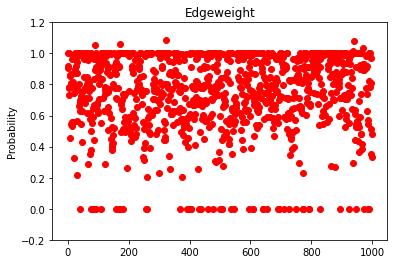

In [347]:
Wei=weight[0:1000]
plt.ylabel("Probability") #Y轴标签
plt.title("Edgeweight") 
x1=range(len(Wei))
plt.ylim(-0.2, 1.2) 
plt.scatter(x1, Wei,  color='r',label='K_v,w')


In [83]:
x=['0-0.1','0.1-0.3','0.3-0.5','0.5-0.7','>0.7']
y=[0,0,0,0,0]
for i in g2.edata['w']:
    if float(i)<0.1:
        y[0]+=1
    elif float(i)<0.3:
        y[1]+=1
    elif float(i)<0.5:
        y[2]+=1
    elif float(i)<0.7:
        y[3]+=1
    elif float(i)>=0.7:
        y[4]+=1

Text(0.5, 1.0, 'Kv,w')

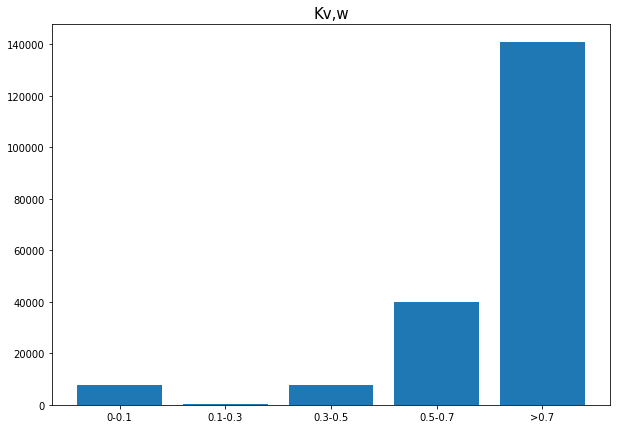

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y)
ax.set_title("Kv,w", fontsize=15)

In [341]:
weight[0:1e4]

TypeError: slice indices must be integers or None or have an __index__ method

In [331]:
f=open('weight.txt','w')
for i in weight:
    f.write(str(i)+' ')
f.close()

In [325]:
len(g2.edata['w'])

196158

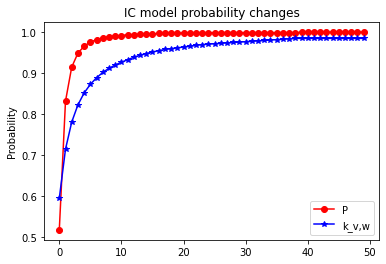

In [310]:
import matplotlib.pyplot as plt

x = range(len(xx))

#plt.plot(x, y, 'ro-')
#plt.plot(x, y1, 'bo-')
#pl.xlim(-1, 11)  # 限定横轴的范围
#pl.ylim(-1, 110)  # 限定纵轴的范围
plt.plot(x, xx, marker='o', color='r',label='P')
plt.plot(x, yy, marker='*',color='blue',label='k_v,w')
plt.legend()  # 让图例生效
plt.ylabel("Probability") #Y轴标签
plt.title("IC model probability changes") #标题

plt.show()


In [312]:
g2.edata

{'w': tensor([0.9850, 0.9680, 1.0000,  ..., 0.9960, 1.0000, 1.0000]), 'backup': tensor([0.3080, 0.3030, 0.2320,  ..., 0.3400, 0.3980, 0.2410])}

In [314]:
g2.edata['w']=g2.edata['backup']

In [162]:
Textsend.index(700)

347

In [163]:
Textsend[347]

700

In [128]:
Pwlist[0]

[70691, 74619]

In [51]:
G=dgl.DGLGraph(multigraph=False)

d:\python\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)
d:\python\lib\site-packages\dgl\base.py:45: DGLWarning: Keyword arguments ['multigraph'] are deprecated in v0.5, and can be safely removed in all cases.
  return warnings.warn(message, category=category, stacklevel=1)


In [52]:
G.add_edges([0, 0, 1,2], [2, 1, 2,2])

In [53]:
G.nodes()

tensor([0, 1, 2])

In [57]:
G.edata['m']=th.tensor(tmmp)

In [56]:
tmmp=[1,2,3,4]

In [61]:
G.edata

{'m': tensor([1, 2, 3, 4, 0])}

In [59]:
G.add_edges(0,0)

In [221]:
len(G.ndata)

0

In [114]:
import random
ttmmmmp=[]
for i in range(4):
    ttmmmmp.append([float(format(random.uniform(0.2,0.4),'.3f'))])

In [115]:
ttmmmmp

[[0.274], [0.272], [0.26], [0.329]]

In [116]:

G.edata['w'] = th.tensor(ttmmmmp)

In [133]:
float(format(float(G.edges[0,1].data['w']),'.3f'))

0.272

In [154]:
G.edges[0,1].data['e']

tensor([[2.]])

In [229]:
G.edata["e"] = th.ones(5, 1)

In [224]:
G.add_edges(0,1)

In [238]:
G.edata['e']

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [3.]])

In [243]:
G.edges[0,1]

EdgeSpace(data={'e': tensor([[1.]])})

In [244]:
G.edges()

(tensor([0, 0, 1, 2, 0]), tensor([2, 1, 2, 2, 1]))

In [236]:
G.edata['e'][4]=th.tensor([[3.]])

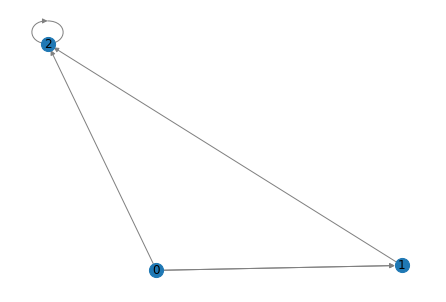

In [226]:
plt.figure()  #转换 dgl graph to networks
p=G.to_networkx()
pos=nx.spring_layout(p)
nx.draw(p, pos, edge_color="grey", node_size=200,with_labels=True) # 画图，设置节点大小

In [35]:
import dgl
import dgl.function as fn
import torch as th
import torch.nn as nn
import torch.nn.functional as F
from dgl import DGLGraph

gcn_msg = fn.u_mul_e('h', 'h', 'm')#update_all的第一个参数，单对象操作，直接拷贝原节点信息作为消息输出
gcn_reduce = fn.sum(msg='m', out='h')#update_all的第二个参数，采用sum作为aggregate方式，吃的上面的输出


In [39]:
class GCNLayer(nn.Module):
    def __init__(self, in_feats, out_feats):
        super(GCNLayer, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)#out_feats是输出的分类数量

    def forward(self, g, feature):
        # Creating a local scope so that all the stored ndata and edata
        # (such as the `'h'` ndata below) are automatically popped out
        # when the scope exits.
        with g.local_scope():
            g.ndata['h'] = feature# 初始化的特征丢给节点
            g.update_all(gcn_msg, gcn_reduce)# 更新节点表征，里面两个函数在上面，考虑一下博文中提出的三个问题
            h = g.ndata['h']#将最后g.ndata读取出来作为结果
            return self.linear(h)#update_all的第二个参数，采用sum作为aggregate方式，吃的上面的输出


In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = GCNLayer(18, 16)#输入1433，输出中间层为16
        self.layer2 = GCNLayer(16, 3)#输入16，最后输出7分类
    
    def forward(self, g, features):
        x = F.relu(self.layer1(g, features))
        x = self.layer2(g, x)#最后输出层不用做ReLU
        return x
net = Net()
print(net)


Net(
  (layer1): GCNLayer(
    (linear): Linear(in_features=18, out_features=16, bias=True)
  )
  (layer2): GCNLayer(
    (linear): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [36]:
from dgl.data import CoraGraphDataset
def load_cora_data():
    dataset = CoraGraphDataset()
    g = dataset[0]
    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    test_mask = g.ndata['test_mask']
    return g, features, labels, train_mask, test_mask


In [352]:
def evaluate(model, g, features, labels):
    model.eval()
    with th.no_grad():
        logits = model(g, features)
        _, indices = th.max(logits, dim=1)
        correct = th.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)


In [41]:
import time
import numpy as np
g, features, labels, train_mask, test_mask = load_cora_data()
# Add edges between each node and itself to preserve old node representations
g.add_edges(g.nodes(), g.nodes())#加selfloop：A'=A+I
optimizer = th.optim.Adam(net.parameters(), lr=1e-2)
dur = []


  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.


In [47]:
len(features[0])

1433

In [78]:
for i in features[0]:
    print(i)

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.1111)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.1111)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
te

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)

In [383]:
g.ndata

{'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True]), 'label': tensor([3, 4, 4,  ..., 3, 3, 3]), 'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])}

In [ ]:
for epoch in range(50):
    if epoch >=3:
        t0 = time.time()

    net.train()
    logits = net(g, features)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp, labels)#两步计算交叉熵损失
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch >=3:
        dur.append(time.time() - t0)
    
    acc = evaluate(net, g, features, labels)
    print("Epoch {:05d} | Loss {:.4f} | Test Acc {:.4f} | Time(s) {:.4f}".format(
            epoch, loss.item(), acc, np.mean(dur)))


In [95]:
f=(open('label.txt','w'))
for i in y_train:
    for j in i:
        f.write(str(j)+' ')
    f.write('\n')
f.close()

In [100]:
for i in y_train[0]:
    if i != 0:
        print(i)

1
1
